In [1]:
import os
import pickle
import numpy as np
from helper_fxns import gelman_rubin_trace_dict, create_trace_matrix, merge_traces, convert_param_vec_dict_to_param_dict, sample_plots, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline

/Library/Python/2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Library/Python/2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
os.chdir('..')
os.chdir('..')

In [3]:
trace_arb_nolog = pickle.load(open('earm_dreamz_3chain_a.p'))
trace_arb_log = pickle.load(open('earm_dreamz_3chain_a_log.p'))
trace_probs_norand1 = pickle.load(open('earm_dreamz_3chain_uniform_probs.p'))
trace_probs_norand2 = pickle.load(open('earm_dreamz_3chain_uniform_probs_2.p'))
trace_probs_rand = pickle.load(open('earm_dreamz_3chain_uniform_probs_randomstart.p'))
trace_probs_norand = merge_traces([trace_probs_norand1, trace_probs_norand2])

## Check likelihood values

In [4]:
trace_arb_nolog['momp']

[array([ -5.63964651e+03,  -5.63964651e+03,  -5.63964651e+03, ...,
         -4.21566419e-02,  -4.21566419e-02,  -4.21566419e-02]),
 array([ -4.69549654e+03,  -4.69549654e+03,  -4.69549654e+03, ...,
         -6.81885232e-01,  -6.81885232e-01,  -6.81885232e-01]),
 array([-130.08933852, -130.08933852,  -14.73727291, ...,   -2.16705488,
          -2.16705488,   -2.16705488])]

In [5]:
trace_arb_nolog['icrp']

[array([-16.16874905, -16.16874905, -16.16874905, ...,  -3.63105258,
         -3.63105258,  -3.63105258]),
 array([-140.95294251, -140.95294251, -140.95294251, ...,   -0.54575287,
          -0.54575287,   -0.54575287]),
 array([ -44.08688196,  -44.08688196, -128.13940631, ...,   -6.20690025,
          -6.20690025,   -6.20690025])]

In [6]:
trace_arb_nolog['ecrp']

[array([-24.85789194, -24.85789194, -24.85789194, ...,  -1.34144552,
         -1.34144552,  -1.34144552]),
 array([-110.98186218, -110.98186218, -110.98186218, ...,   -0.76632489,
          -0.76632489,   -0.76632489]),
 array([-35.72718443, -35.72718443, -37.69802087, ...,  -1.21388159,
         -1.21388159,  -1.21388159])]

In [7]:
trace_arb_log['momp']

[array([-5.71669043, -5.71669043, -8.29040958, ...,  8.34483985,
         8.34483985,  8.34483985]),
 array([-3.52245501, -3.52245501, -3.52245501, ...,  7.85901338,
         7.85901338,  7.85901338]),
 array([-3.84153872, -3.84153872, -3.84153872, ...,  8.19699736,
         8.19699736,  8.19699736])]

In [8]:
trace_arb_log['icrp']

[array([-1.26440295, -1.26440295, -0.06472854, ..., -1.46754754,
        -1.46754754, -1.46754754]),
 array([-2.33340389, -2.33340389, -2.33340389, ...,  0.05866581,
         0.05866581,  0.05866581]),
 array([-3.1778515 , -3.1778515 , -3.1778515 , ..., -0.09354585,
        -0.09354585, -0.09354585])]

In [9]:
trace_arb_log['ecrp']

[array([-4.25102724, -4.25102724, -3.6296735 , ..., -3.55650239,
        -3.55650239, -3.55650239]),
 array([-2.59257468, -2.59257468, -2.59257468, ...,  2.24109621,
         2.24109621,  2.24109621]),
 array([-0.45905134, -0.45905134, -0.45905134, ...,  2.69392654,
         2.69392654,  2.69392654])]

In [10]:
trace_probs_norand['momp']

[array([-3.75323432, -3.75323432, -3.75323432, ..., -4.76564553,
        -4.76564553, -4.76564553]),
 array([-5.21757604, -5.21757604, -5.21757604, ..., -4.68566859,
        -4.68566859, -4.68566859]),
 array([-4.19199265, -4.19199265, -4.19199265, ..., -4.83003786,
        -4.83003786, -4.83003786])]

In [11]:
trace_probs_norand['icrp']

[array([-1.11351601, -1.11351601, -1.11351601, ...,  1.24106471,
         1.24106471,  1.24106471]),
 array([-1.54844824, -1.54844824, -1.54844824, ...,  1.24143569,
         1.24143569,  1.24143569]),
 array([-0.79321367, -0.79321367, -0.79321367, ...,  1.21546557,
         1.21546557,  1.21546557])]

In [12]:
trace_probs_norand['ecrp']

[array([-1.21326534, -1.21326534, -1.21326534, ...,  1.33792677,
         1.33792677,  1.33792677]),
 array([-0.28754633, -0.28754633, -0.28754633, ...,  1.29642486,
         1.29642486,  1.29642486]),
 array([-0.71633484, -0.71633484, -0.71633484, ...,  1.3235692 ,
         1.3235692 ,  1.3235692 ])]

In [13]:
trace_probs_rand['momp']

[array([-5.22332746, -5.22387381, -5.22387381, ..., -5.22254968,
        -5.22254968, -5.22254968]),
 array([-5.22437149, -5.22197489, -5.22218385, ..., -5.22248934,
        -5.22248934, -5.22248934]),
 array([-5.22260591, -5.22288024, -5.22339204, ..., -5.22248545,
        -5.22248545, -5.22248545])]

In [14]:
trace_probs_rand['icrp']

[array([-1.59081289, -1.59081289, -1.59081289, ...,  1.39403133,
         1.39403133,  1.39403133]),
 array([-1.59081289, -1.59081289, -1.59081276, ...,  1.40807588,
         1.40807588,  1.40807588]),
 array([-1.59081289, -1.59081289, -1.59081289, ...,  1.38657579,
         1.38657579,  1.38657579])]

In [15]:
trace_probs_rand['ecrp']

[array([-1.57635407, -1.57635303, -1.57635303, ...,  1.03884978,
         1.03884978,  1.03884978]),
 array([-1.57635413, -1.57635413, -1.57635413, ...,  1.02609695,
         1.02609695,  1.02609695]),
 array([-1.57635413, -1.57635413, -1.57635413, ...,  1.03786963,
         1.03786963,  1.03786963])]

## Check convergence

In [16]:
del trace_arb_nolog['momp']
del trace_arb_nolog['ecrp']
del trace_arb_nolog['icrp']
del trace_arb_nolog['momp_output']
del trace_arb_nolog['ecrp_output']
del trace_arb_nolog['icrp_output']
del trace_arb_log['momp']
del trace_arb_log['icrp']
del trace_arb_log['ecrp']
del trace_arb_log['momp_output']
del trace_arb_log['icrp_output']
del trace_arb_log['ecrp_output']
del trace_probs_norand['momp']
del trace_probs_norand['icrp']
del trace_probs_norand['ecrp']
del trace_probs_rand['momp']
del trace_probs_rand['icrp']
del trace_probs_rand['ecrp']

In [17]:
param_trace_arb_nolog = convert_param_vec_dict_to_param_dict(trace_arb_nolog, model.parameters_rules())
param_trace_arb_log = convert_param_vec_dict_to_param_dict(trace_arb_log, model.parameters_rules())
param_trace_probs_norand = convert_param_vec_dict_to_param_dict(trace_probs_norand, model.parameters_rules())
param_trace_probs_rand = convert_param_vec_dict_to_param_dict(trace_probs_rand, model.parameters_rules())

In [18]:
gelman_rubin_trace_dict(param_trace_arb_nolog)

{'assemble_pore_sequential_Bak_2_kf': 1.0071354020896239,
 'assemble_pore_sequential_Bak_2_kr': 1.020546579001262,
 'assemble_pore_sequential_Bak_3_kf': 1.0034680135628944,
 'assemble_pore_sequential_Bak_3_kr': 1.0168143423512717,
 'assemble_pore_sequential_Bak_4_kf': 1.0027085984720137,
 'assemble_pore_sequential_Bak_4_kr': 1.0178305591058303,
 'assemble_pore_sequential_Bax_2_kf': 1.0461123669900156,
 'assemble_pore_sequential_Bax_2_kr': 1.000441410249677,
 'assemble_pore_sequential_Bax_3_kf': 1.0121709711173335,
 'assemble_pore_sequential_Bax_3_kr': 1.0083300285062216,
 'assemble_pore_sequential_Bax_4_kf': 1.0112879518948825,
 'assemble_pore_sequential_Bax_4_kr': 1.0152365354983051,
 'bind_Apop_C3pro_to_ApopC3pro_kf': 1.0138049992371618,
 'bind_Apop_C3pro_to_ApopC3pro_kr': 1.0103663110255985,
 'bind_Apop_XIAP_kf': 1.039939943610279,
 'bind_Apop_XIAP_kr': 1.0086308828867405,
 'bind_BAR_C8A_kf': 1.0328070763435953,
 'bind_BAR_C8A_kr': 1.0018253916765421,
 'bind_BadM_Bcl2_kf': 1.0025431

In [19]:
gelman_rubin_trace_dict(param_trace_arb_log)

{'assemble_pore_sequential_Bak_2_kf': 1.0433913365404377,
 'assemble_pore_sequential_Bak_2_kr': 1.0265038999255913,
 'assemble_pore_sequential_Bak_3_kf': 1.106512546797471,
 'assemble_pore_sequential_Bak_3_kr': 1.0227723185670479,
 'assemble_pore_sequential_Bak_4_kf': 1.0152228930584539,
 'assemble_pore_sequential_Bak_4_kr': 1.01300629735915,
 'assemble_pore_sequential_Bax_2_kf': 1.1837358640543709,
 'assemble_pore_sequential_Bax_2_kr': 1.0214799932849246,
 'assemble_pore_sequential_Bax_3_kf': 1.0269613929975681,
 'assemble_pore_sequential_Bax_3_kr': 1.0138370798908154,
 'assemble_pore_sequential_Bax_4_kf': 1.1093541102266817,
 'assemble_pore_sequential_Bax_4_kr': 1.023990725617828,
 'bind_Apop_C3pro_to_ApopC3pro_kf': 1.0087703696509653,
 'bind_Apop_C3pro_to_ApopC3pro_kr': 1.0394542169455439,
 'bind_Apop_XIAP_kf': 1.050624334576427,
 'bind_Apop_XIAP_kr': 1.0290870277903341,
 'bind_BAR_C8A_kf': 1.0147350474271937,
 'bind_BAR_C8A_kr': 1.0688160398781257,
 'bind_BadM_Bcl2_kf': 1.034659191

In [20]:
gelman_rubin_trace_dict(param_trace_probs_norand)

{'assemble_pore_sequential_Bak_2_kf': 1.0276977582599887,
 'assemble_pore_sequential_Bak_2_kr': 1.0392741985650966,
 'assemble_pore_sequential_Bak_3_kf': 1.0382754077520999,
 'assemble_pore_sequential_Bak_3_kr': 1.0070032166437013,
 'assemble_pore_sequential_Bak_4_kf': 1.028494000171051,
 'assemble_pore_sequential_Bak_4_kr': 1.0056763602805758,
 'assemble_pore_sequential_Bax_2_kf': 1.0505667338513445,
 'assemble_pore_sequential_Bax_2_kr': 1.0036264522576144,
 'assemble_pore_sequential_Bax_3_kf': 1.0016289165935826,
 'assemble_pore_sequential_Bax_3_kr': 1.0268119872820369,
 'assemble_pore_sequential_Bax_4_kf': 1.0118959083417438,
 'assemble_pore_sequential_Bax_4_kr': 1.0044709706123116,
 'bind_Apop_C3pro_to_ApopC3pro_kf': 1.0070772463859119,
 'bind_Apop_C3pro_to_ApopC3pro_kr': 1.0308056613993259,
 'bind_Apop_XIAP_kf': 1.0479259643969101,
 'bind_Apop_XIAP_kr': 1.0240482489434661,
 'bind_BAR_C8A_kf': 1.0189907203111004,
 'bind_BAR_C8A_kr': 1.0085088026930729,
 'bind_BadM_Bcl2_kf': 1.03704

In [21]:
gelman_rubin_trace_dict(param_trace_probs_rand)

{'assemble_pore_sequential_Bak_2_kf': 1.0304037475207781,
 'assemble_pore_sequential_Bak_2_kr': 1.0370012180245891,
 'assemble_pore_sequential_Bak_3_kf': 1.0213597061228599,
 'assemble_pore_sequential_Bak_3_kr': 1.0196029898165213,
 'assemble_pore_sequential_Bak_4_kf': 1.1335534131613445,
 'assemble_pore_sequential_Bak_4_kr': 1.0770149192604366,
 'assemble_pore_sequential_Bax_2_kf': 1.0578621150148713,
 'assemble_pore_sequential_Bax_2_kr': 1.0131531871714083,
 'assemble_pore_sequential_Bax_3_kf': 1.0129827311479882,
 'assemble_pore_sequential_Bax_3_kr': 1.0103367463416821,
 'assemble_pore_sequential_Bax_4_kf': 1.127753378826563,
 'assemble_pore_sequential_Bax_4_kr': 1.1292509945056652,
 'bind_Apop_C3pro_to_ApopC3pro_kf': 1.022268367812698,
 'bind_Apop_C3pro_to_ApopC3pro_kr': 1.0748135260353646,
 'bind_Apop_XIAP_kf': 1.1294528922148144,
 'bind_Apop_XIAP_kr': 1.0231288416809141,
 'bind_BAR_C8A_kf': 1.1408872182690564,
 'bind_BAR_C8A_kr': 1.0967164489536698,
 'bind_BadM_Bcl2_kf': 1.133945

## Sample plots

100000
3
100000


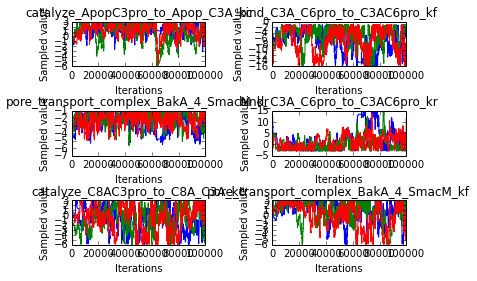

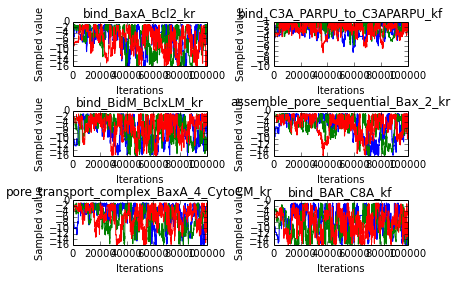

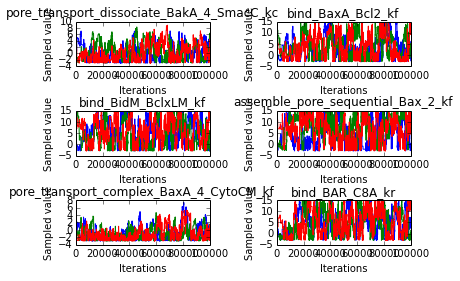

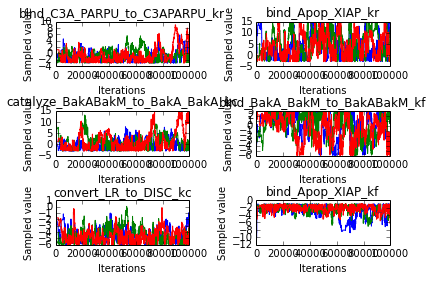

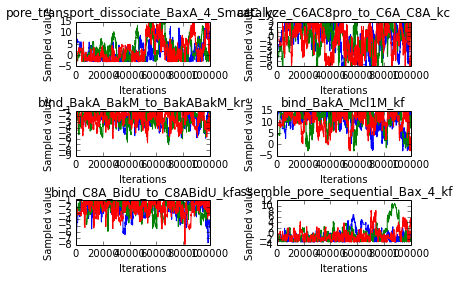

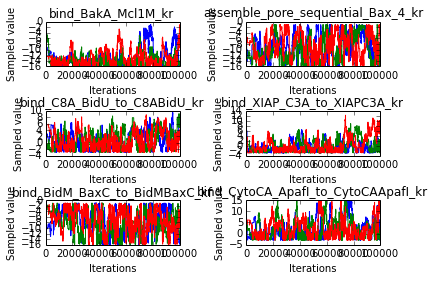

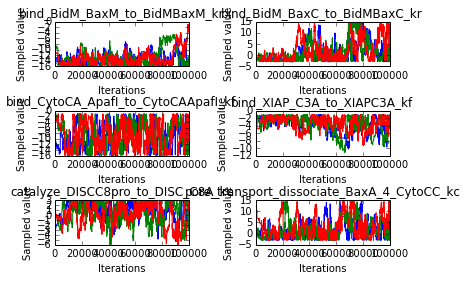

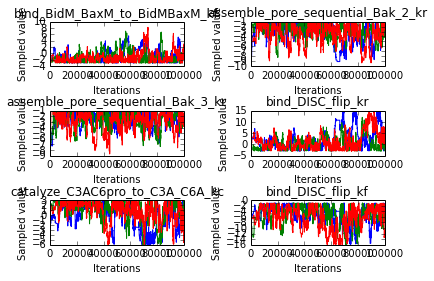

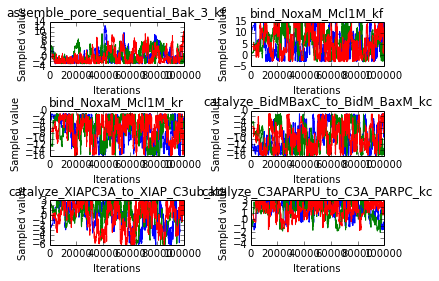

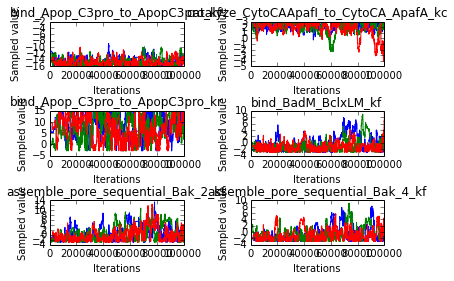

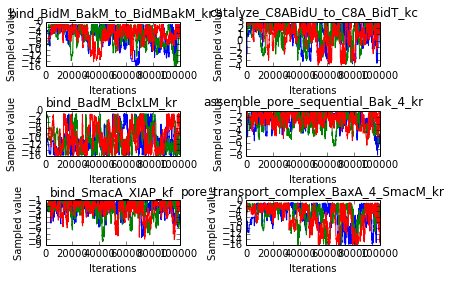

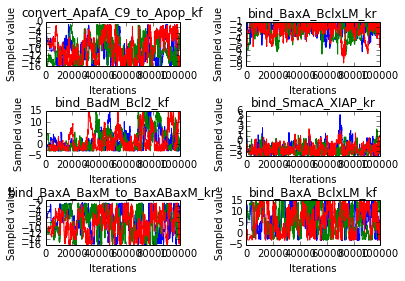

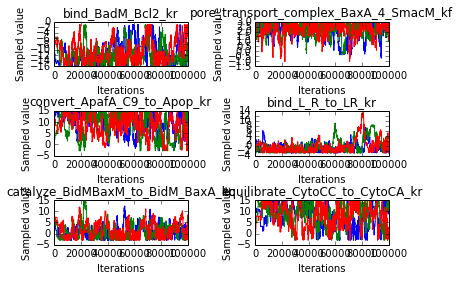

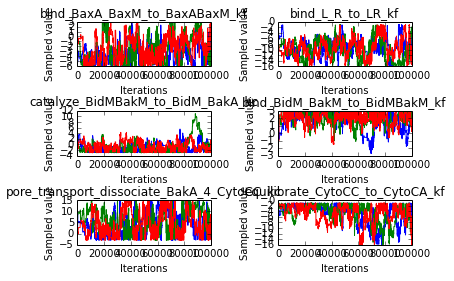

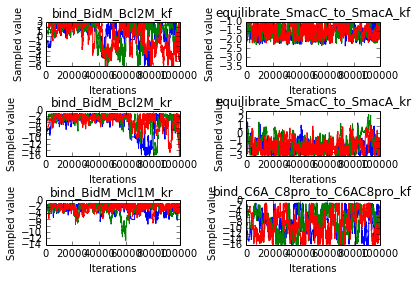

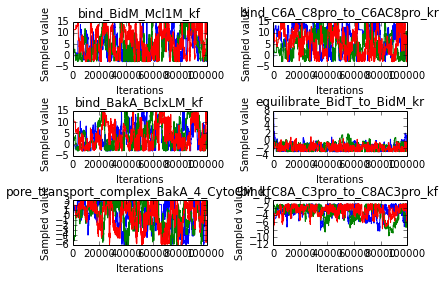

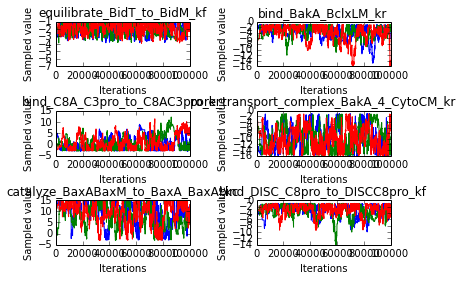

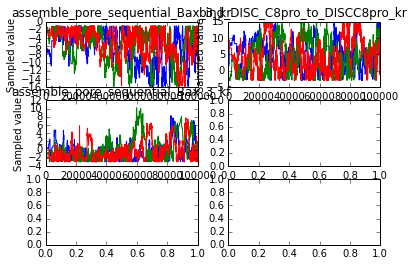

In [23]:
samples_arb_nolog = sample_plots(param_trace_arb_nolog)

100000
3
100000


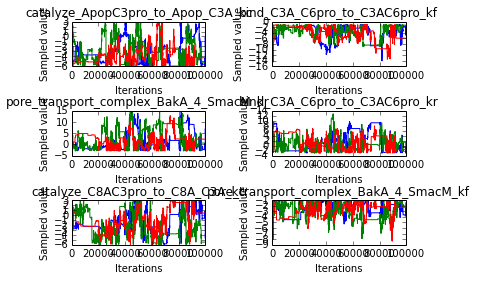

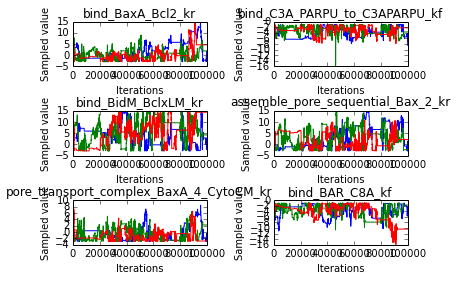

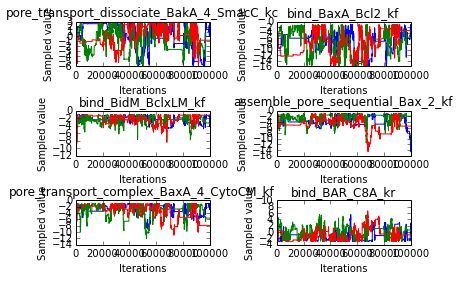

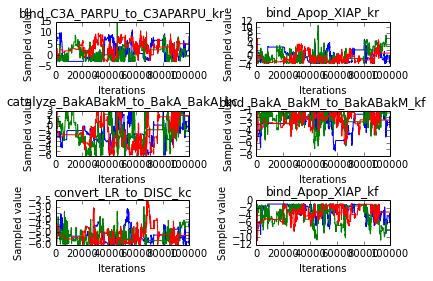

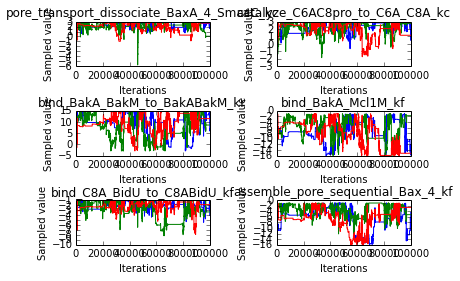

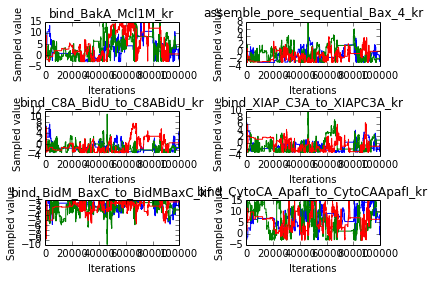

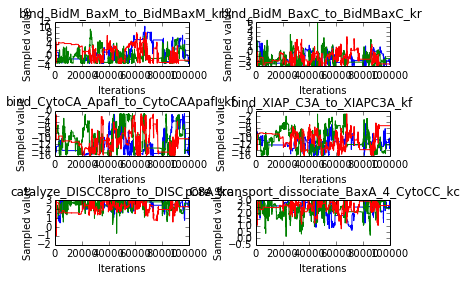

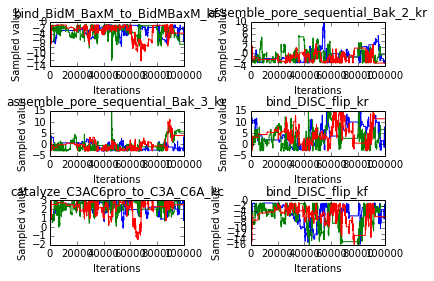

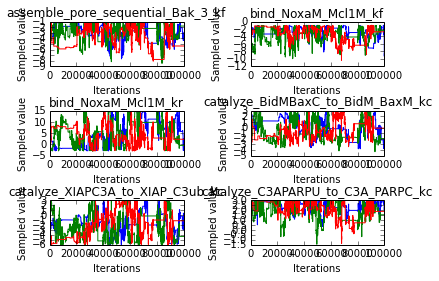

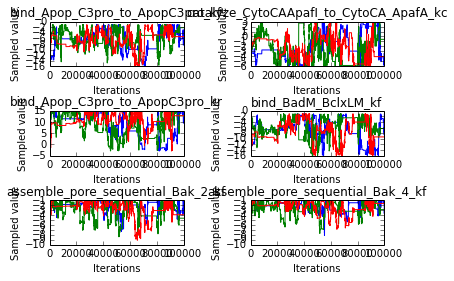

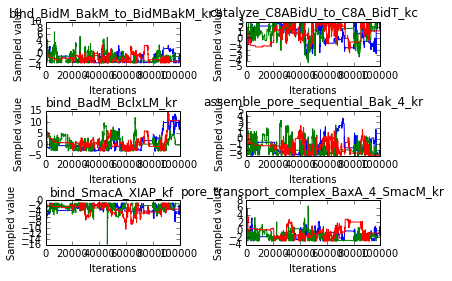

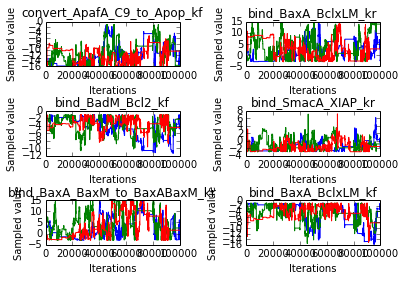

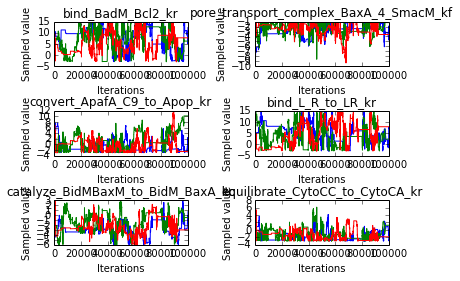

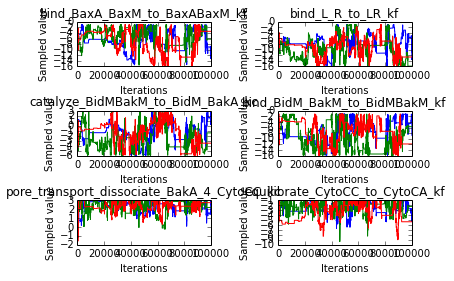

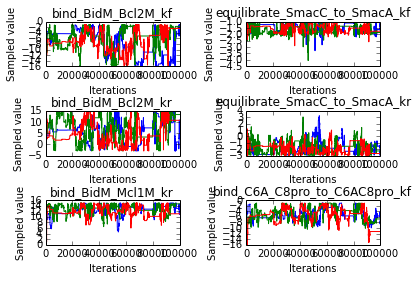

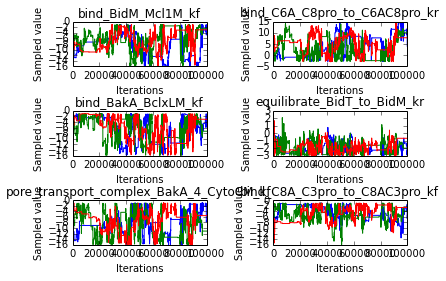

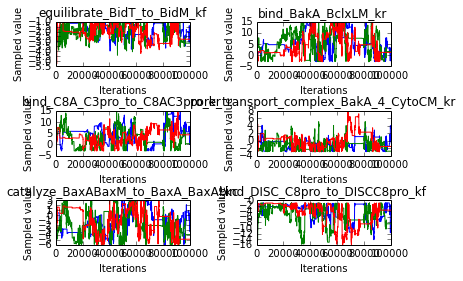

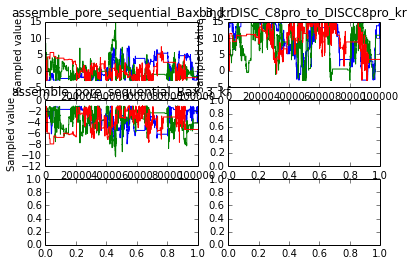

In [24]:
samples_arb_log = sample_plots(param_trace_arb_log)

100000
3
100000


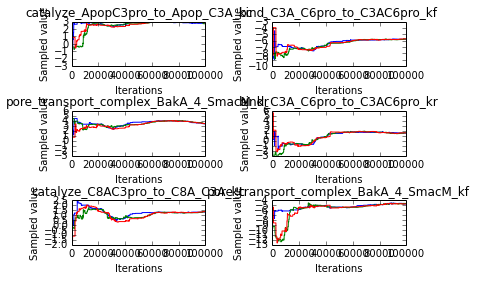

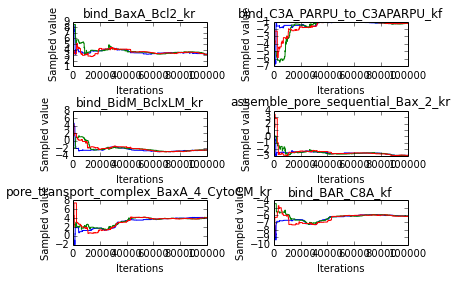

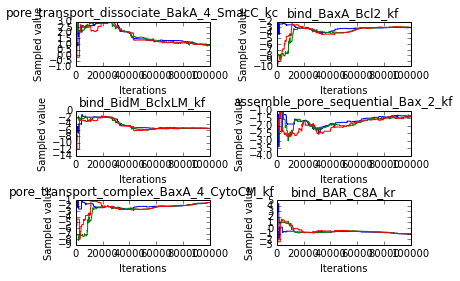

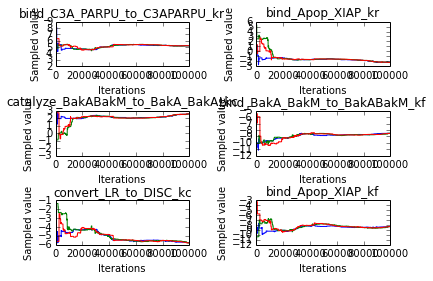

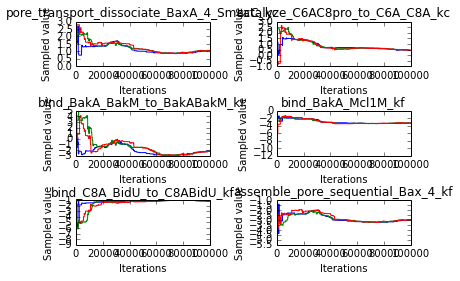

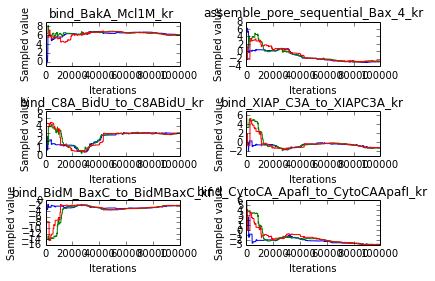

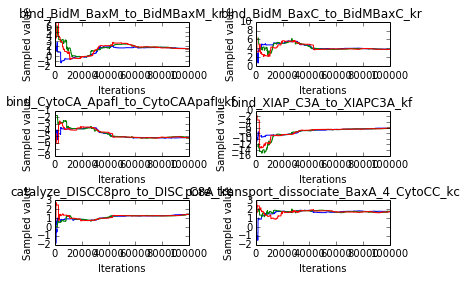

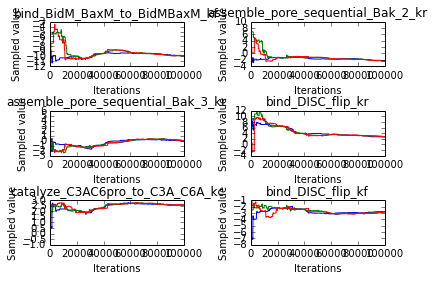

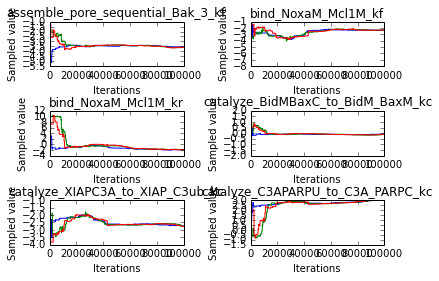

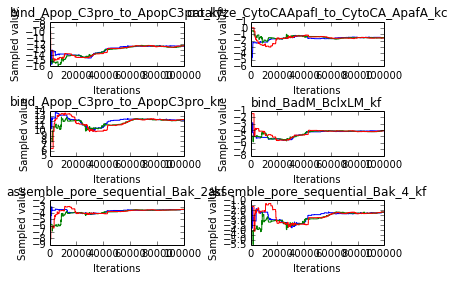

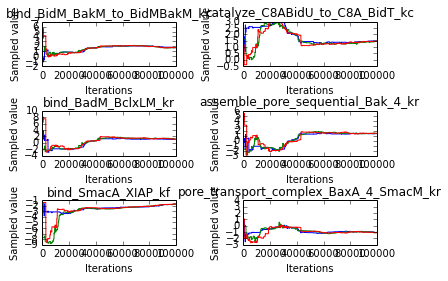

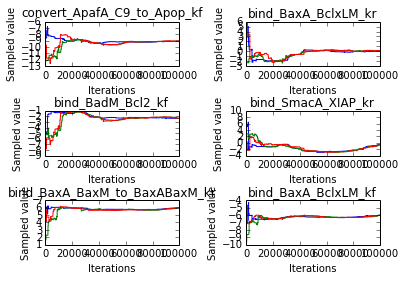

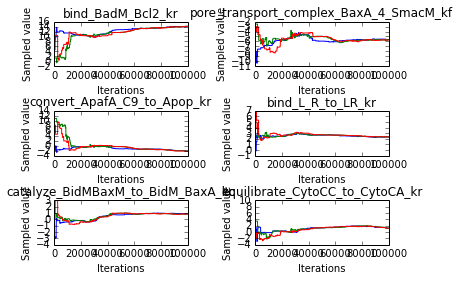

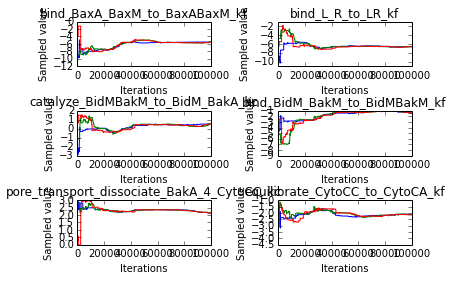

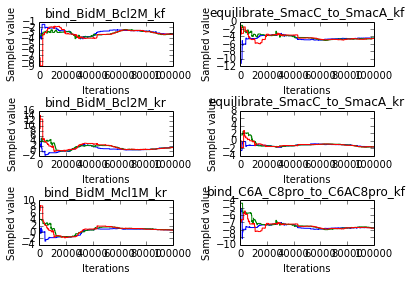

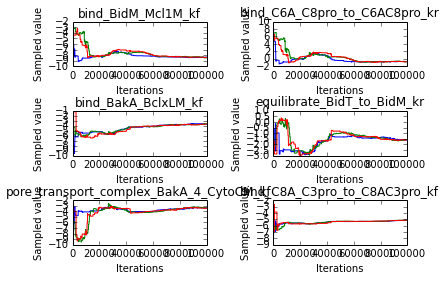

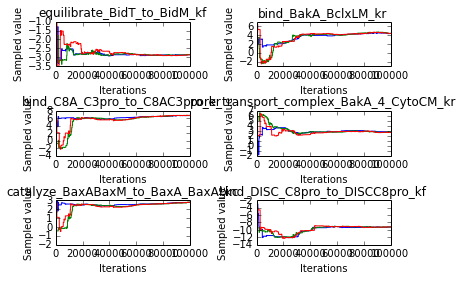

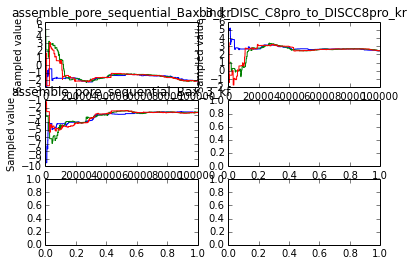

In [25]:
samples_probs_norand = sample_plots(param_trace_probs_norand)

100000
3
100000


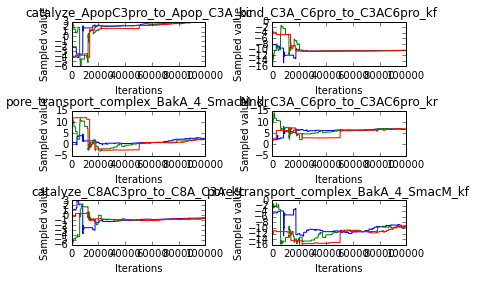

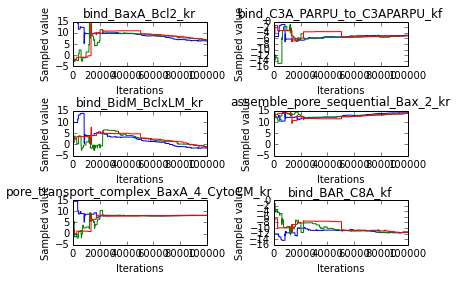

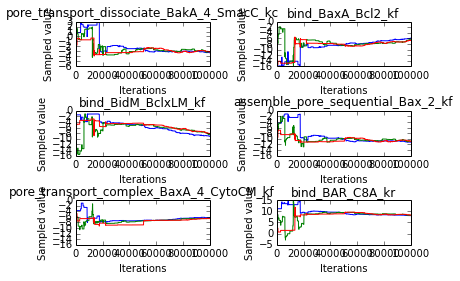

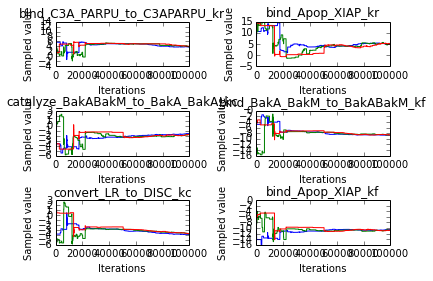

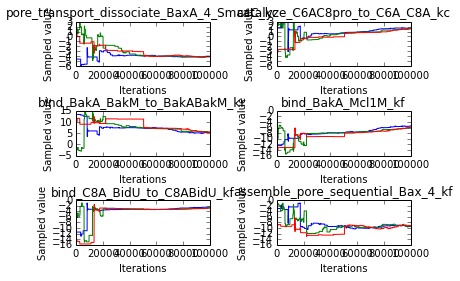

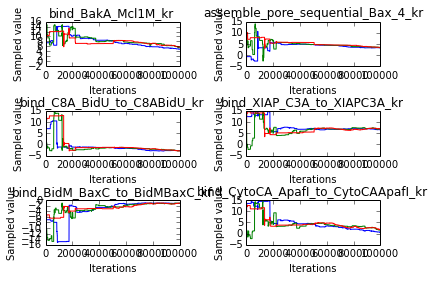

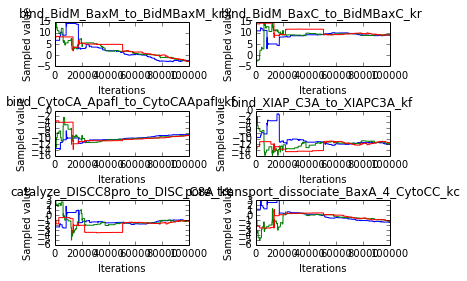

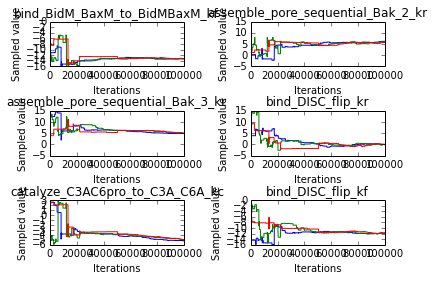

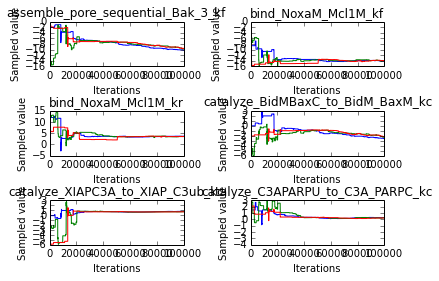

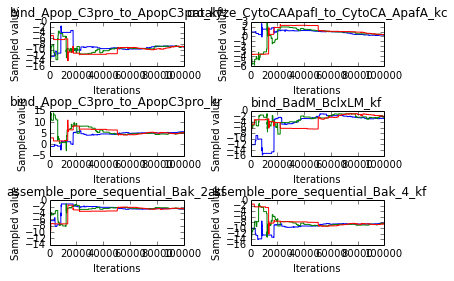

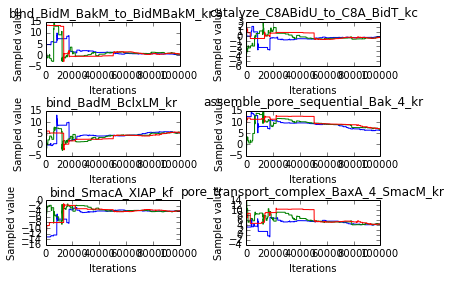

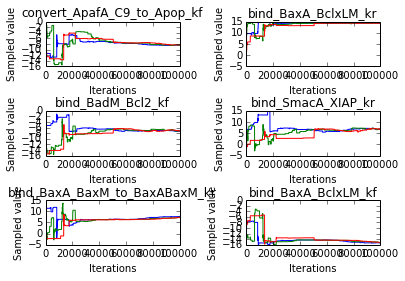

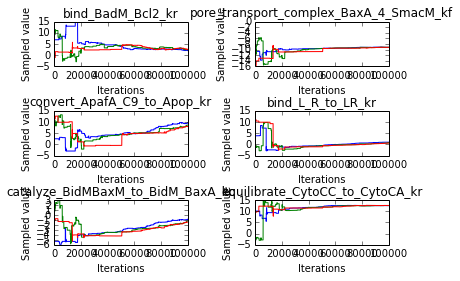

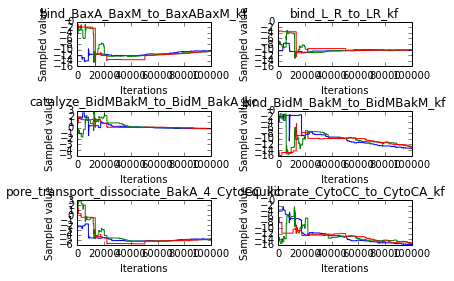

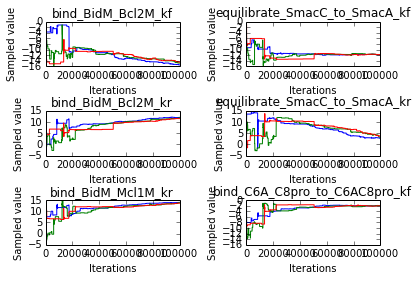

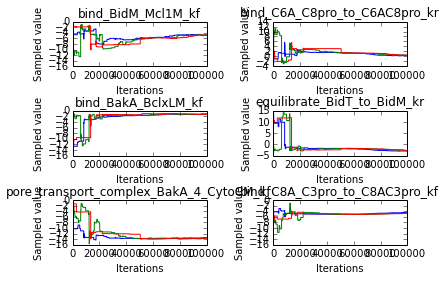

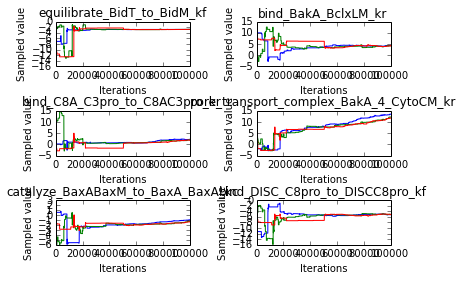

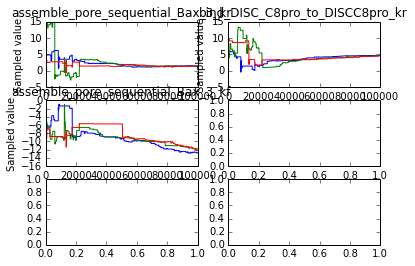

In [26]:
samples_probs_rand = sample_plots(param_trace_probs_rand)

## Histograms

In [28]:
trace_arr_arb_nolog = create_trace_matrix(param_trace_arb_nolog, burnin=20000)
trace_arr_arb_log = create_trace_matrix(param_trace_arb_log, burnin=20000)
trace_arr_probs_norand = create_trace_matrix(param_trace_probs_norand, burnin=20000)
trace_arr_probs_rand = create_trace_matrix(param_trace_probs_rand, burnin=20000)

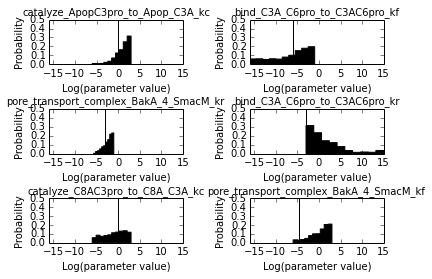

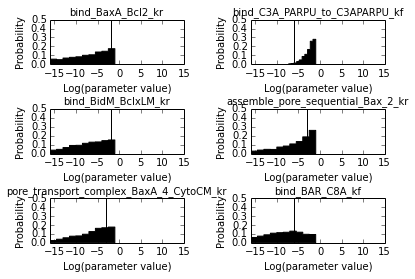

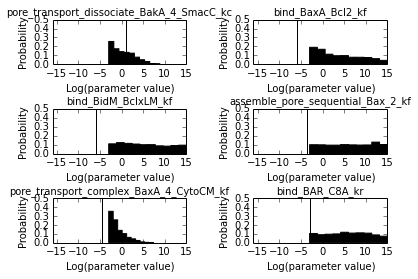

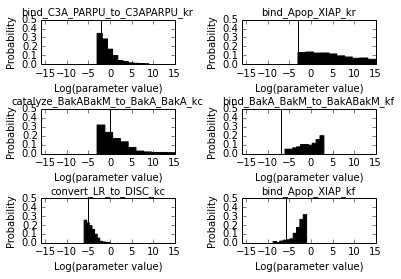

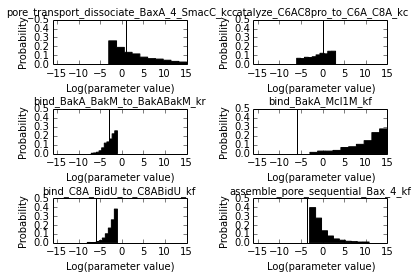

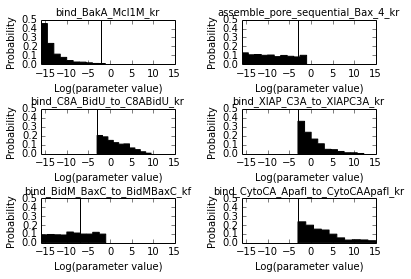

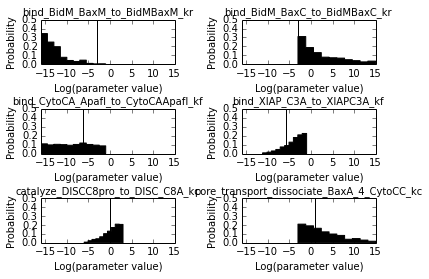

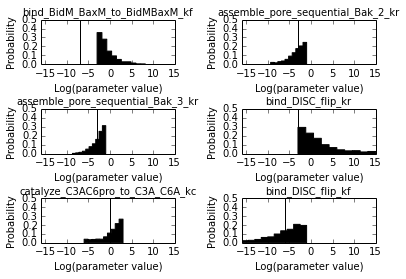

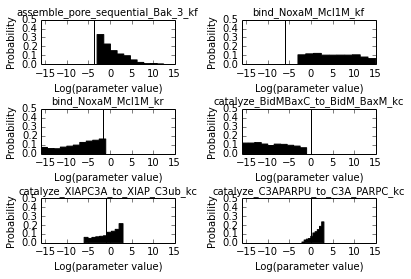

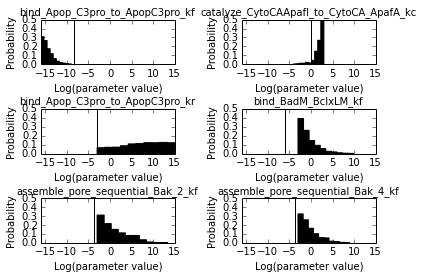

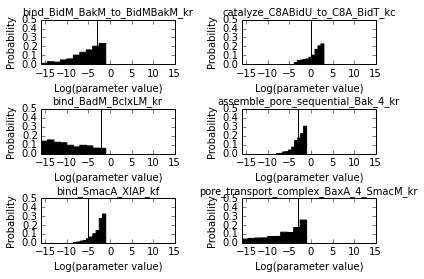

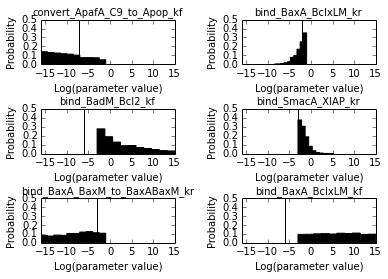

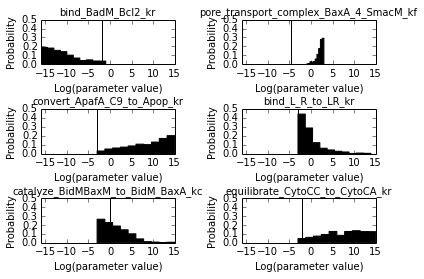

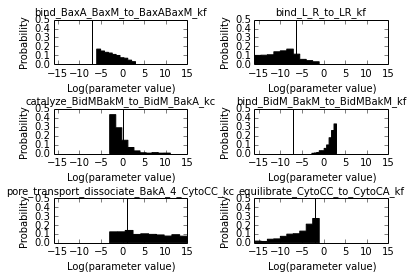

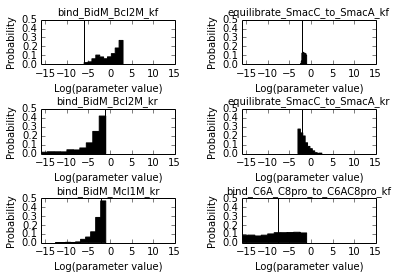

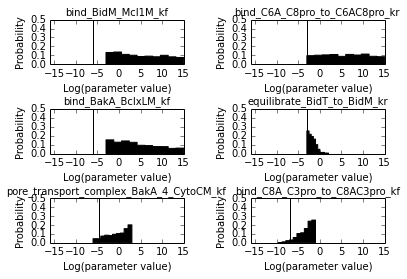

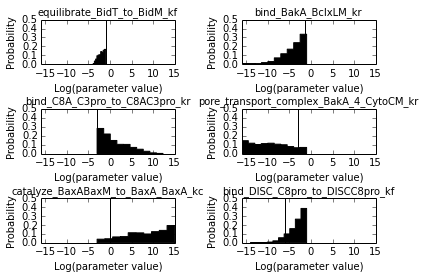

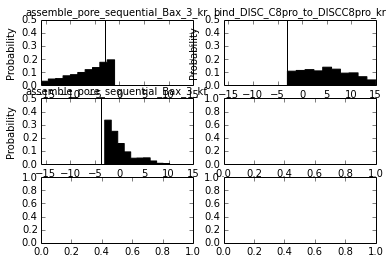

In [29]:
hists_arb_nolog = plot_histograms(param_trace_arb_nolog, trace_arr_arb_nolog, plot_original_vals=True, model=model, title_fontsize=10)

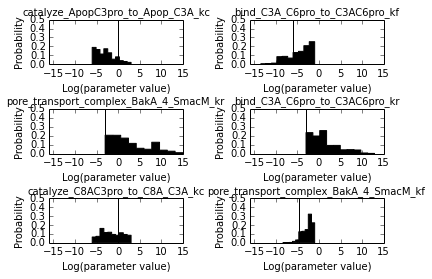

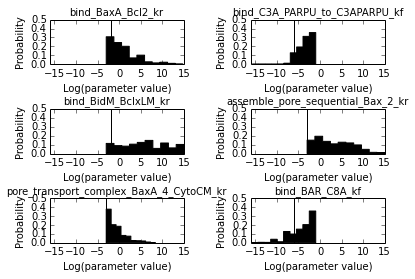

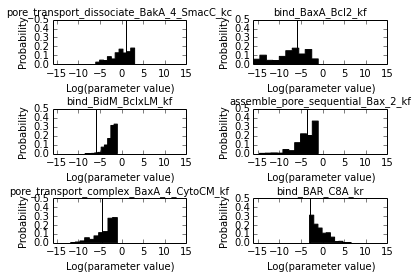

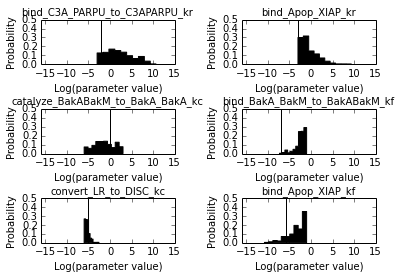

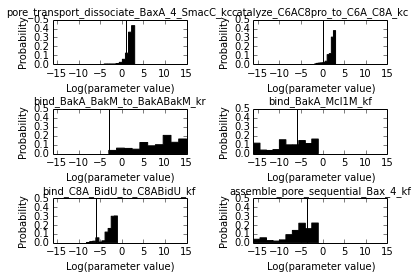

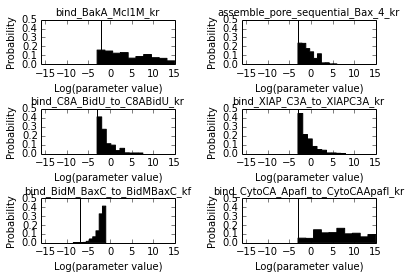

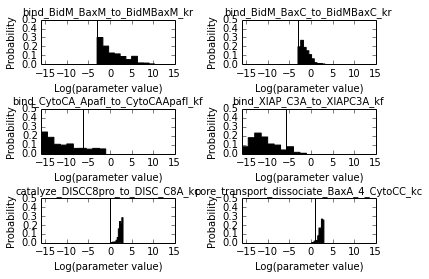

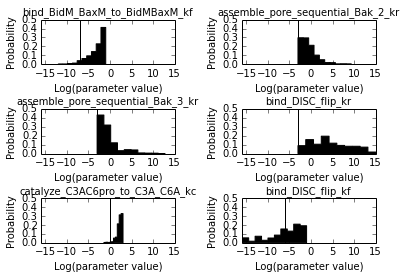

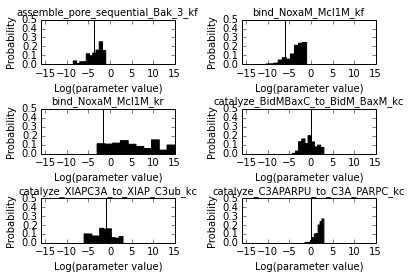

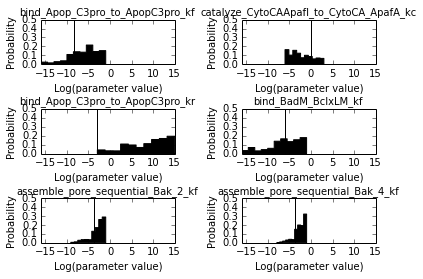

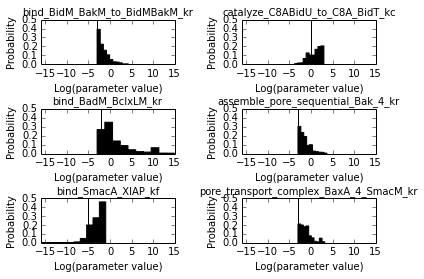

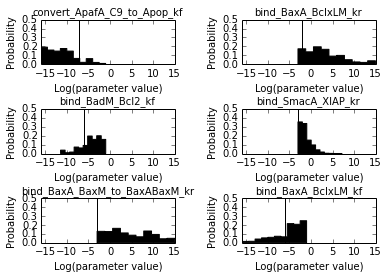

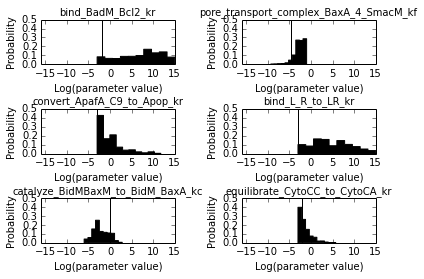

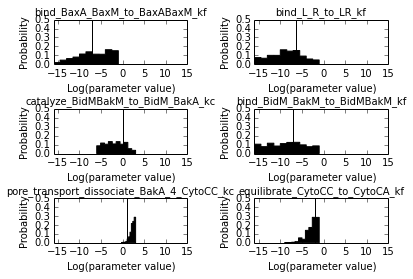

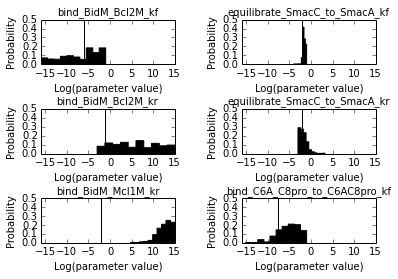

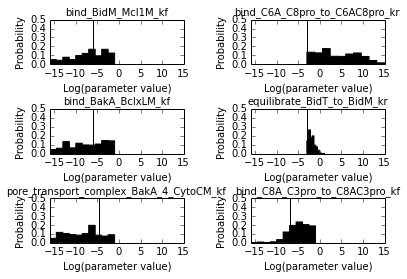

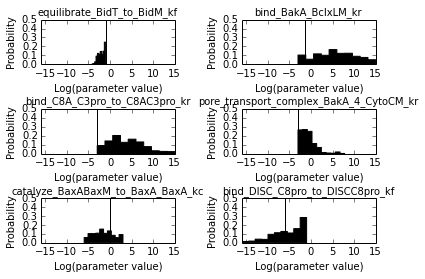

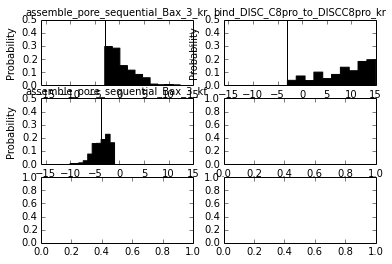

In [31]:
hists_arb_log = plot_histograms(param_trace_arb_log, trace_arr_arb_log, plot_original_vals=True, model=model, title_fontsize=10)

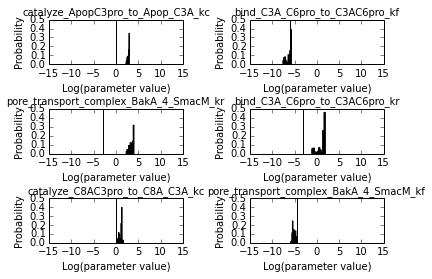

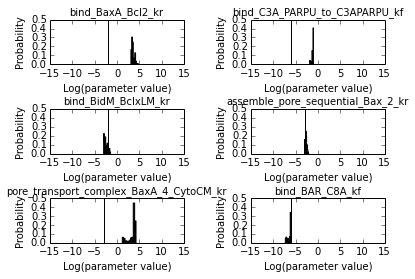

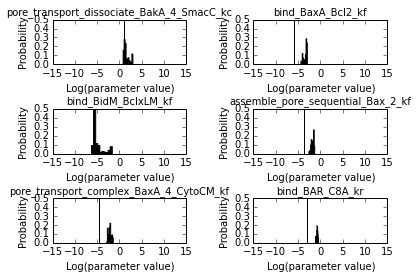

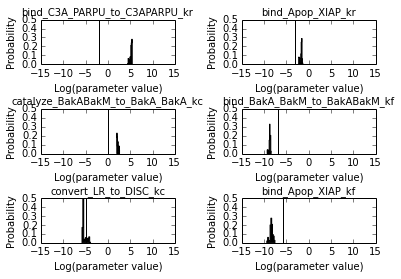

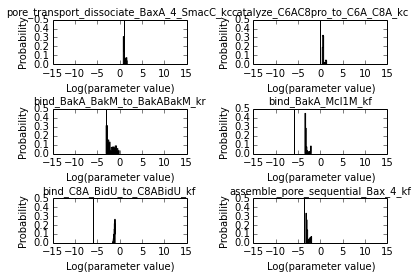

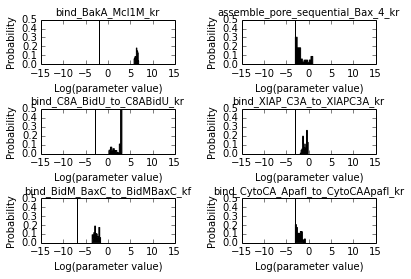

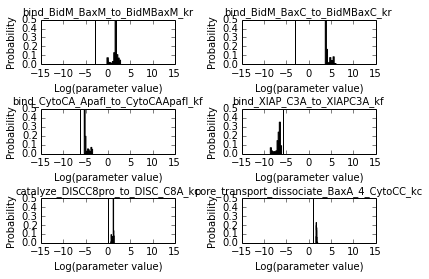

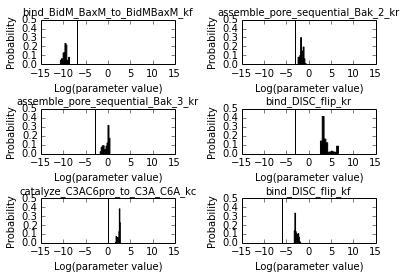

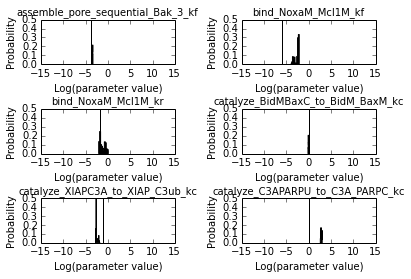

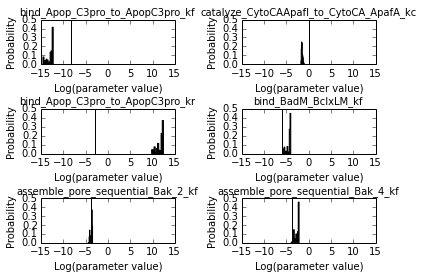

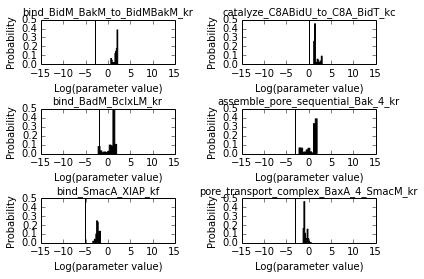

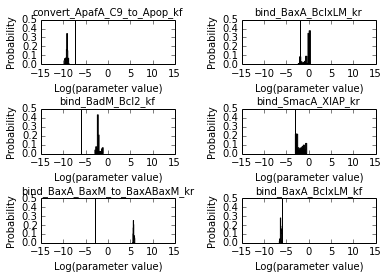

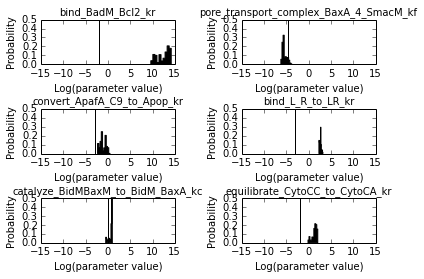

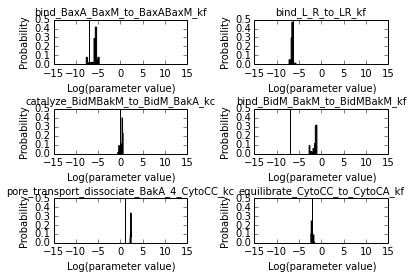

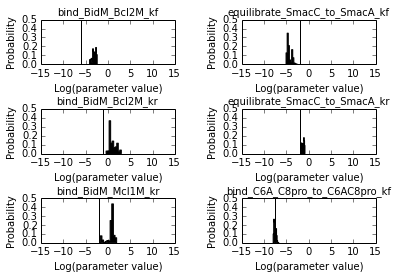

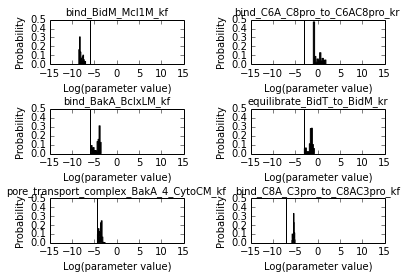

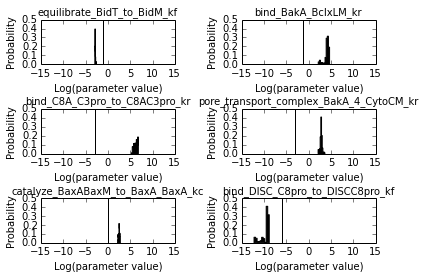

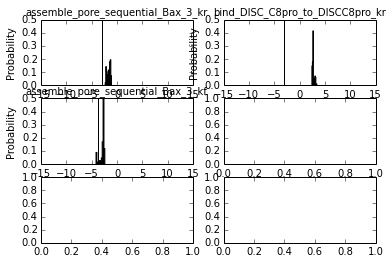

In [32]:
hists_probs_norand = plot_histograms(param_trace_probs_norand, trace_arr_probs_norand, plot_original_vals=True, model=model, title_fontsize=10)

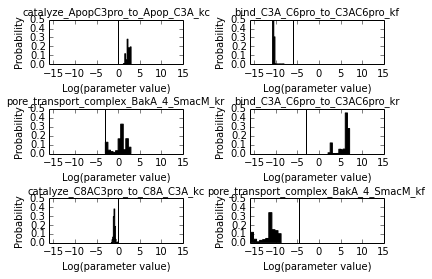

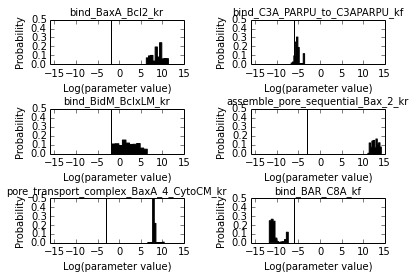

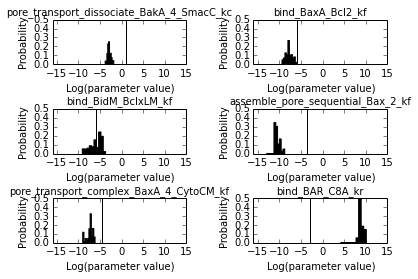

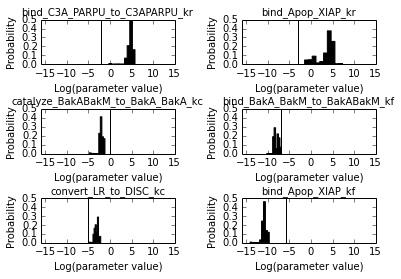

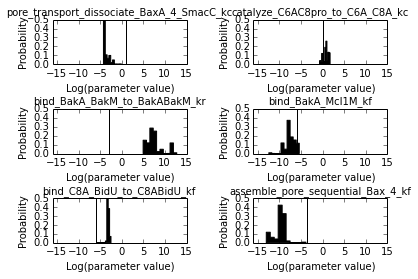

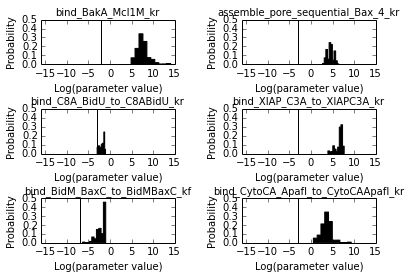

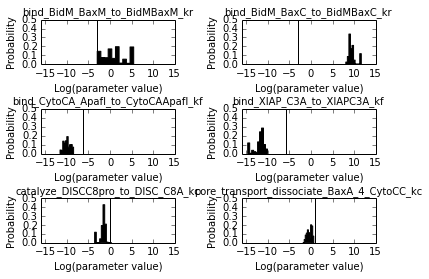

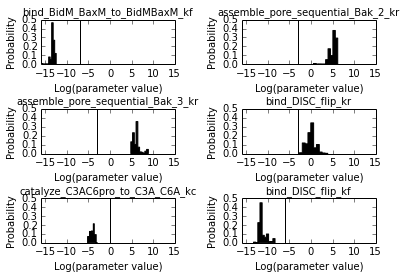

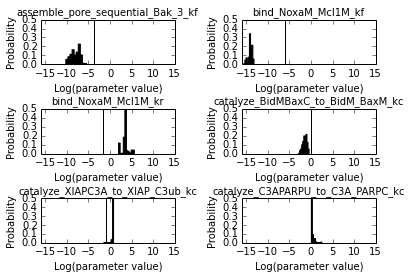

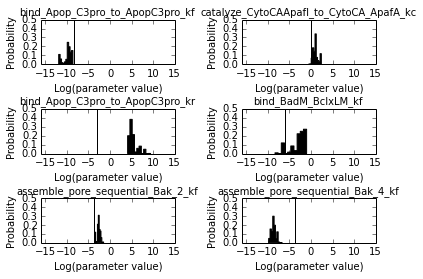

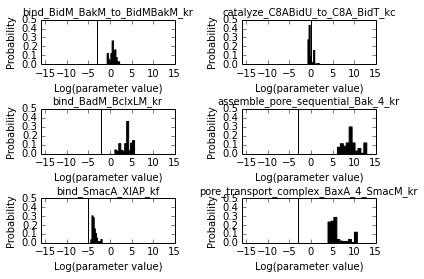

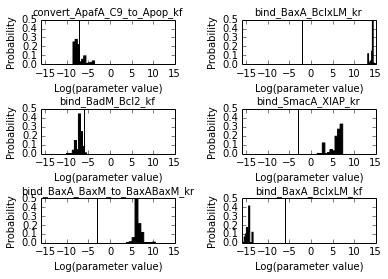

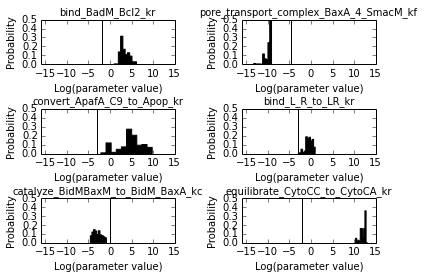

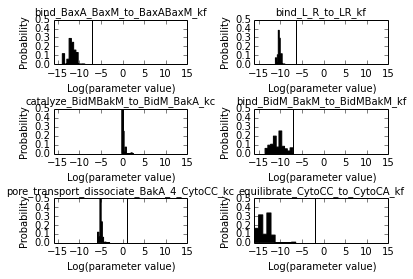

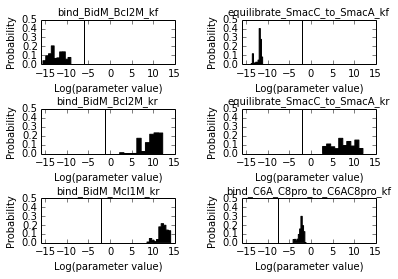

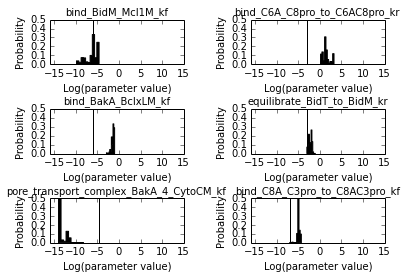

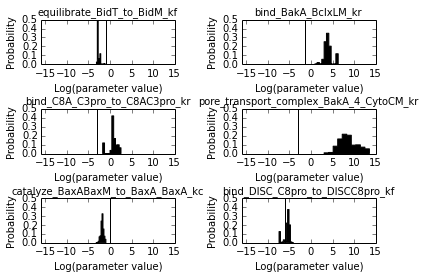

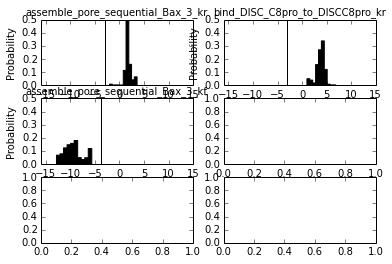

In [33]:
hists_probs_rand = plot_histograms(param_trace_probs_rand, trace_arr_probs_rand, plot_original_vals=True, model=model, title_fontsize=10)